### Background Information:

Pokemon has been a popular video game title for Nintendo for generations.  Most people can recognize some of the poster Pokemon, such as Pikachu (yellow mouse) and Charizard (orange dragon).  Pokemon is still a continuing series to this day and attracts more people as the years go on.

I found an open available dataset that someone has created that includes pokemon name and their stat line (both overall and individual categories), type(s), generation and legendary status.  Each variable with be explained in depth for those unfamiliar with Pokemon.

### Goal:

For the sake of data analysis practice and my curiousity as a life-long Pokemon player, I am most interested in learning which non-legendary Pokemon holds the highest overall stat and highest in each individual stat.

### For those not familiar with Pokemon (some definitions and explanation):


I have repeatedly said things like "stat" and "legendary" but for those who have barely any knowledge on Pokemon, that is very confusing.

Starting with stat, stat is just short for statistic.  Pokemon are use to battle each other in battle and these statistics help determine the outcome of the battle. It gets rather in-depth how they are used and calculated against each other in battle, but we are just going to cover the basic idea of them.


#### **Every Pokemon has 6 stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed**

Each value listed above is a numeric value.  

Again, lot of things can factor into effecting these values, but for the sake of simplicity we're going to take these values as their base line.  Normally each Pokemon has a default value (basically the average) of what that number should be and a range of what that value can be.  We are sticking with the default (average) value.

*  **HP (Hit Points)** - how much damage a Pokemon can receive before fainting (no longer able to battle)
*  **Attack** - how much damage a Pokemon deals when using a ***physical move***
* **Defense** - how much damage a Pokemon receives when recieving a ***physical move***
*  **Special Attack** - how much damage a Pokemon deals when using a ***special move***
*  **Special Defense** - how much damage a Pokemon receives when recieving a ***special move***
*  **Speed** - determines the order that Pokemon can act in battle (generally higher speed value goes first)

The **total statistic** is just all these base stats added together

#### **Legendary Pokemon and Mega Pokemon**

Legendary Pokemon are rare and often very powerful Pokemon generally featuring in legends and myths of the Pokemon world.

The important thing to note about them is that Legendary Pokemon generally have a higher statistic line overall so they tend to overshadow the regular Pokemon. That's why I would like to see the non-legendary in each stat.  Legendary Pokemon tend to be outliers of regular Pokemon in terms of performance.

Mega Evolution Pokemon are a newer Pokemon concept and also are not their own Pokemon outside of battle.  They are just statistic inflators and cosmetic changes to the orginal Pokemon, so I will also exclude them as well.

Now it gets more complex than that, but that's all you need to know in order to explore the data, so let's get started

### Overall Data Preview:

In [64]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


# loading the file and necessary data into a pandas dataframe
fields = ['Name','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']
pkmn_df = pd.read_csv("Pokemon.csv", usecols=fields)

In [65]:
# preview the data
print(pkmn_df.head())
print(pkmn_df.tail())
print("Number of rows, columns:" , pkmn_df.shape)

                    Name  Total  HP  Attack  ...  Sp. Atk  Sp. Def  Speed  Legendary
0              Bulbasaur    318  45      49  ...       65       65     45      False
1                Ivysaur    405  60      62  ...       80       80     60      False
2               Venusaur    525  80      82  ...      100      100     80      False
3  VenusaurMega Venusaur    625  80     100  ...      122      120     80      False
4             Charmander    309  39      52  ...       60       50     65      False

[5 rows x 9 columns]
                    Name  Total  HP  Attack  ...  Sp. Atk  Sp. Def  Speed  Legendary
795              Diancie    600  50     100  ...      100      150     50       True
796  DiancieMega Diancie    700  50     160  ...      160      110    110       True
797  HoopaHoopa Confined    600  80     110  ...      150      130     70       True
798   HoopaHoopa Unbound    680  80     160  ...      170      130     80       True
799            Volcanion    600  80     110

Looking at the file, I can see that the user has incorporated generation 1 through 6. Pokemon has 8 generations as of today, but doing the first 6 generations is a good enough size.  Just know the overall highest in each category could have change with the introduction of more Pokemon.

### Preparing the Data:


In [66]:
# checking the type of dataframe elements
print(pkmn_df.dtypes)

Name         object
Total         int64
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Legendary      bool
dtype: object


Since all the data types are good, the main thing I need to do to prepare the data is rename the columns and create a separate dataframes for each chart.  As putting 700+ pokemon on one chart will make it VERY difficult to read. (As you can see from the below visualization - basically useless in information.  There's too much clutter.)

In [67]:
# renaming the columns
print(pkmn_df.columns)
pkmn_df = pkmn_df.rename(columns={'Total': 'Total Stat', 'Sp. Atk': 'Special Attack', 'Sp. Def': 'Special Defense'})
print(pkmn_df.columns)

Index(['Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Legendary'],
      dtype='object')
Index(['Name', 'Total Stat', 'HP', 'Attack', 'Defense', 'Special Attack',
       'Special Defense', 'Speed', 'Legendary'],
      dtype='object')


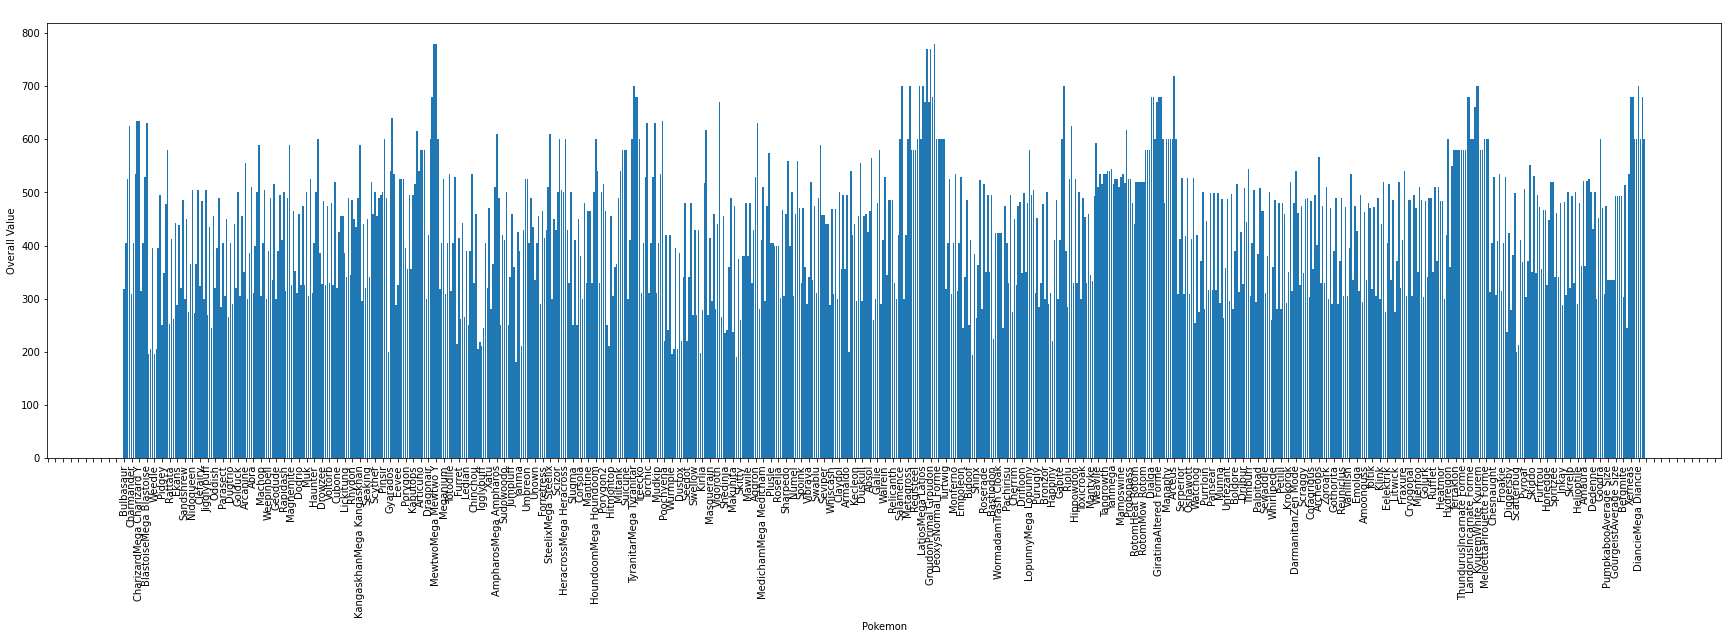

In [68]:
# Determining the highest overall stat (difficult to read)
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

plt.bar(pkmn_df['Name'], pkmn_df["Total Stat"])
plt.title('Pokemon Overall Stat',color='white')
plt.xlabel('Pokemon')
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Overall Value')

plt.show()

In [72]:
# creating a dataframe with the non-legendary Pokemon and mega evolution Pokemon
norm_pkmn_df = pd.DataFrame()
pkmn_list = pkmn_df['Name'].tolist()

for index in range(len(pkmn_df)):
  if pkmn_df['Legendary'][index] == False and not("Mega " in pkmn_list[index]):
    norm_pkmn_df = norm_pkmn_df.append(pkmn_df.iloc[index], ignore_index=True)
    index = index + 1
  else:
    index = index + 1
print(norm_pkmn_df)

     Attack  Defense    HP  ...  Special Defense  Speed  Total Stat
0      49.0     49.0  45.0  ...             65.0   45.0       318.0
1      62.0     63.0  60.0  ...             80.0   60.0       405.0
2      82.0     83.0  80.0  ...            100.0   80.0       525.0
3      52.0     43.0  39.0  ...             50.0   65.0       309.0
4      64.0     58.0  58.0  ...             65.0   80.0       405.0
..      ...      ...   ...  ...              ...    ...         ...
688   100.0    122.0  85.0  ...             75.0   54.0       494.0
689    69.0     85.0  55.0  ...             35.0   28.0       304.0
690   117.0    184.0  95.0  ...             46.0   28.0       514.0
691    30.0     35.0  40.0  ...             40.0   55.0       245.0
692    70.0     80.0  85.0  ...             80.0  123.0       535.0

[693 rows x 9 columns]


After cutting out the outliers, I need to create individual dataframes for each stat to graph as 693 Pokemon is still too many to graph overall.

In [78]:
# creating a dataframe with the total stat over 500 Pokemon
total_pkmn_df = pd.DataFrame()

for index in range(len(norm_pkmn_df)):
  if int(norm_pkmn_df['Total Stat'][index]) > 550:
    total_pkmn_df = total_pkmn_df.append(norm_pkmn_df.iloc[index], ignore_index=True)
    index = index + 1
  else:
    index = index + 1
print(total_pkmn_df)

    Attack  Defense     HP  ...  Special Defense  Speed  Total Stat
0    110.0     80.0   90.0  ...             80.0   95.0       555.0
1    134.0     95.0   91.0  ...            100.0   80.0       600.0
2    100.0    100.0  100.0  ...            100.0  100.0       600.0
3    134.0    110.0  100.0  ...            100.0   61.0       600.0
4    100.0    100.0  100.0  ...            100.0  100.0       600.0
5    160.0    100.0  150.0  ...             65.0  100.0       670.0
6    135.0     80.0   95.0  ...             80.0  100.0       600.0
7    135.0    130.0   80.0  ...             90.0   70.0       600.0
8    130.0     95.0  108.0  ...             85.0  102.0       600.0
9     70.0    120.0  120.0  ...            130.0   85.0       600.0
10   100.0    100.0  100.0  ...            100.0  100.0       600.0
11   140.0     65.0   75.0  ...             65.0  110.0       567.0
12   105.0     90.0   92.0  ...             90.0   98.0       600.0
13    72.0     90.0   91.0  ...             90.0

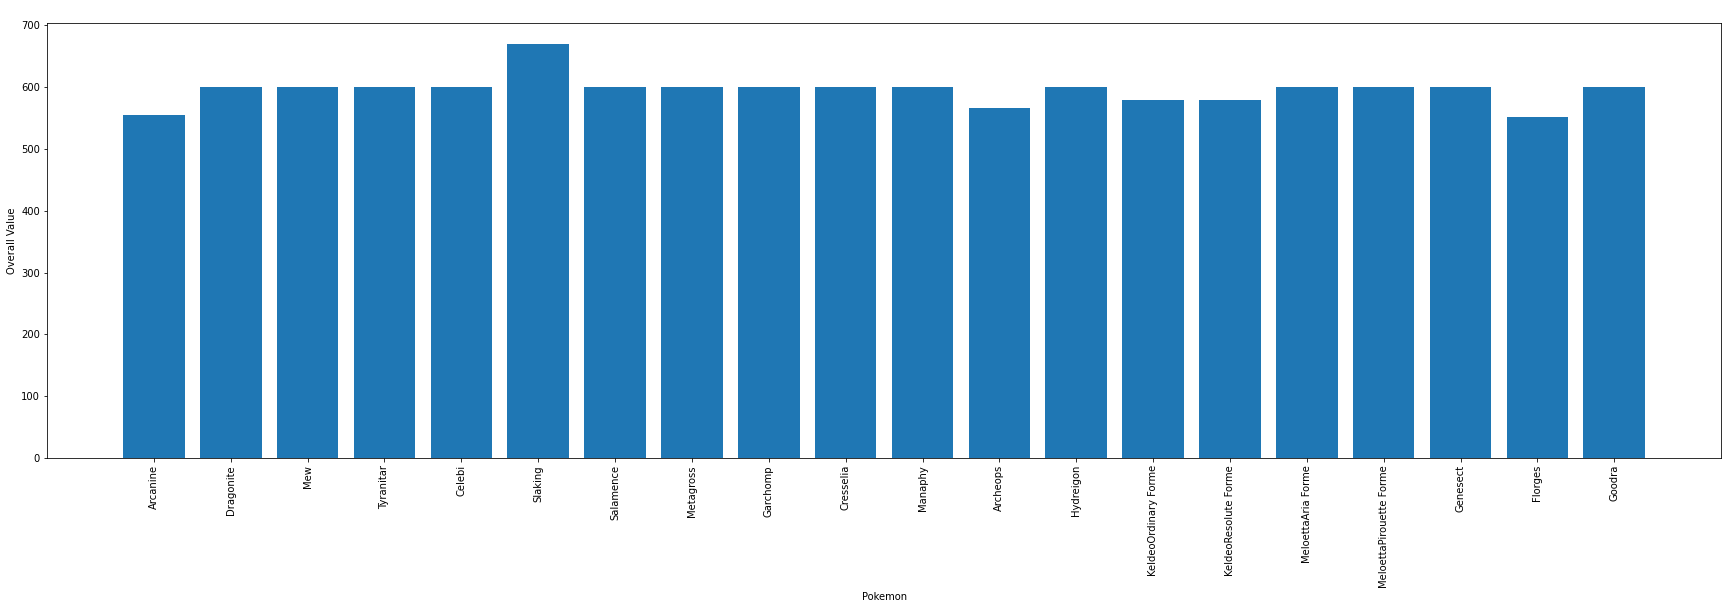

In [79]:
# Determining the highest overall stat
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

plt.bar(total_pkmn_df['Name'], total_pkmn_df["Total Stat"])
plt.title('Pokemon Overall Stat',color='white')
plt.xlabel('Pokemon')
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Overall Value')

plt.show()

After trial and error, you can see from the chart that Slaking has the highest overall stat line.

Next is hit points.

In [108]:
# creating a dataframe with the hit points over 125 Pokemon
hp_pkmn_df = pd.DataFrame()

for index in range(len(norm_pkmn_df)):
  if int(norm_pkmn_df['HP'][index]) > 125:
    hp_pkmn_df = hp_pkmn_df.append(norm_pkmn_df.iloc[index], ignore_index=True)
    index = index + 1
  else:
    index = index + 1
print(hp_pkmn_df)

    Attack  Defense     HP  ...  Special Defense  Speed  Total Stat
0     70.0     45.0  140.0  ...             50.0   45.0       435.0
1      5.0      5.0  250.0  ...            105.0   50.0       450.0
2     85.0     80.0  130.0  ...             95.0   60.0       535.0
3     65.0     60.0  130.0  ...             95.0   65.0       525.0
4    110.0     65.0  160.0  ...            110.0   30.0       540.0
5     33.0     58.0  190.0  ...             58.0   33.0       405.0
6     10.0     10.0  255.0  ...            135.0   55.0       540.0
7    160.0    100.0  150.0  ...             65.0  100.0       670.0
8    120.0     60.0  144.0  ...             60.0   50.0       474.0
9     70.0     35.0  130.0  ...             35.0   60.0       400.0
10    90.0     45.0  170.0  ...             45.0   60.0       500.0
11    80.0     44.0  150.0  ...             54.0   80.0       498.0
12    85.0     40.0  135.0  ...             85.0    5.0       390.0
13    75.0     80.0  165.0  ...             45.0

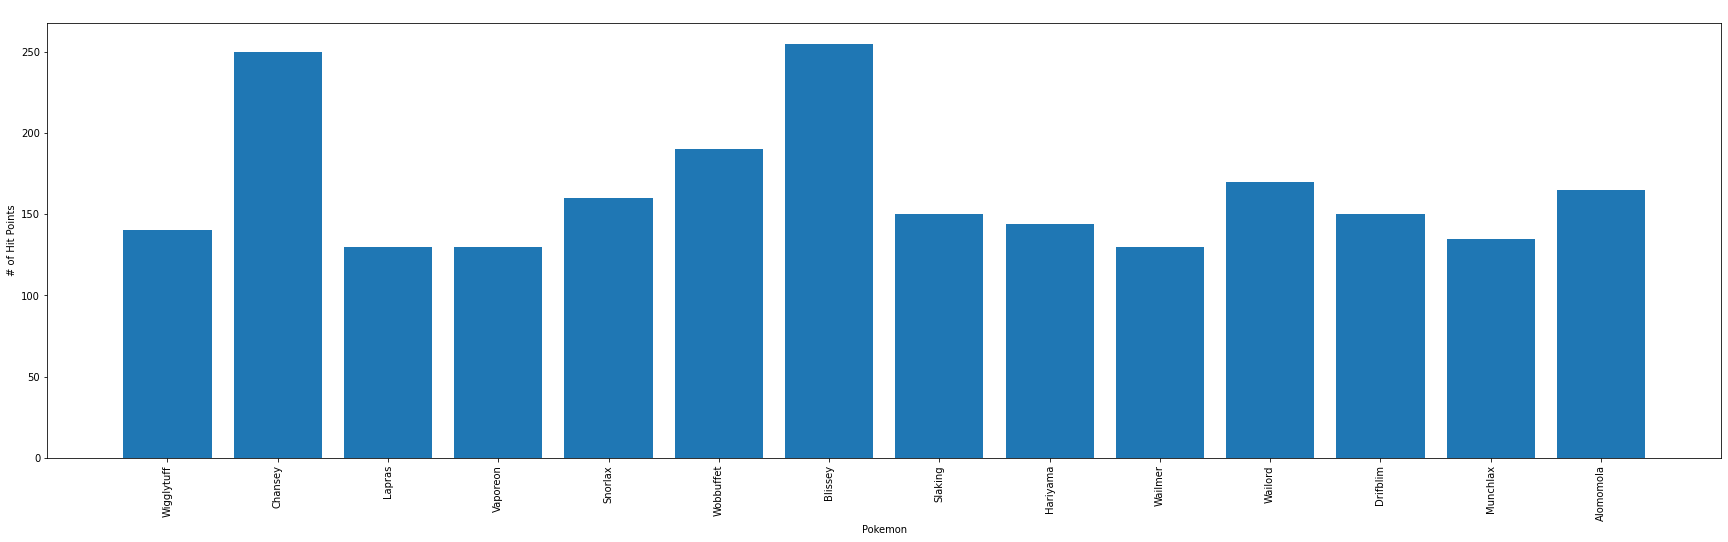

In [110]:
# Determining the hit points
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

plt.bar(hp_pkmn_df['Name'], hp_pkmn_df["HP"])
plt.title('Pokemon HP Stat',color='white')
plt.xlabel('Pokemon')
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('# of Hit Points')

plt.show()

From the chart we can determine that, despite being so close, Blissey has the most hit points.

Next is attack stat.

In [87]:
# creating a dataframe with the attack stat over 125 Pokemon
attack_pkmn_df = pd.DataFrame()

for index in range(len(norm_pkmn_df)):
  if int(norm_pkmn_df['Attack'][index]) > 125:
    attack_pkmn_df = attack_pkmn_df.append(norm_pkmn_df.iloc[index], ignore_index=True)
    index = index + 1
  else:
    index = index + 1
print(attack_pkmn_df)

    Attack  Defense     HP  ...  Special Defense  Speed  Total Stat
0    130.0     80.0   90.0  ...             85.0   55.0       505.0
1    130.0    115.0   55.0  ...             50.0   75.0       475.0
2    130.0    120.0  105.0  ...             45.0   40.0       485.0
3    130.0     60.0   65.0  ...            110.0   65.0       525.0
4    134.0     95.0   91.0  ...            100.0   80.0       600.0
5    130.0    100.0   70.0  ...             80.0   65.0       500.0
6    130.0     75.0   90.0  ...             75.0   55.0       500.0
7    134.0    110.0  100.0  ...            100.0   61.0       600.0
8    130.0     80.0   60.0  ...             60.0   70.0       460.0
9    160.0    100.0  150.0  ...             65.0  100.0       670.0
10   130.0     60.0   65.0  ...             60.0   75.0       465.0
11   135.0     80.0   95.0  ...             80.0  100.0       600.0
12   135.0    130.0   80.0  ...             90.0   70.0       600.0
13   165.0     60.0   97.0  ...             50.0

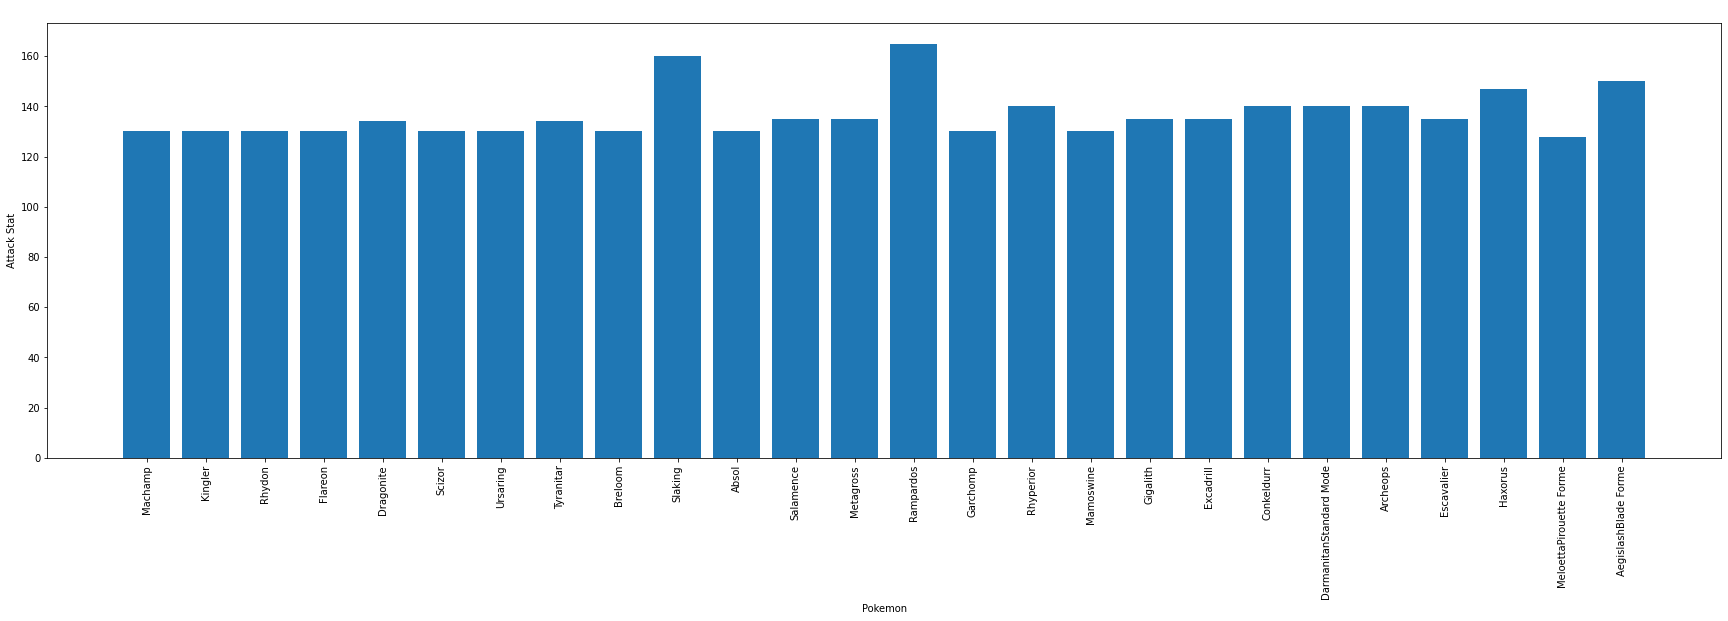

In [111]:
# Determining the attack stat
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

plt.bar(attack_pkmn_df['Name'], attack_pkmn_df["Attack"])
plt.title('Pokemon Attack Stat',color='white')
plt.xlabel('Pokemon')
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Attack Stat')

plt.show()

From the chart we can determine that Rampardos has the highest attack stat.

Next is defense stat.

In [90]:
# creating a dataframe with the defense stat over 125 Pokemon
defense_pkmn_df = pd.DataFrame()

for index in range(len(norm_pkmn_df)):
  if int(norm_pkmn_df['Defense'][index]) > 125:
    defense_pkmn_df = defense_pkmn_df.append(norm_pkmn_df.iloc[index], ignore_index=True)
    index = index + 1
  else:
    index = index + 1
print(defense_pkmn_df)

    Attack  Defense     HP  ...  Special Defense Speed  Total Stat
0    120.0    130.0   80.0  ...             65.0  45.0       495.0
1     95.0    180.0   50.0  ...             45.0  70.0       525.0
2     45.0    160.0   35.0  ...             45.0  70.0       385.0
3     90.0    140.0   75.0  ...             60.0  40.0       465.0
4     85.0    200.0   75.0  ...             65.0  30.0       510.0
5     10.0    230.0   20.0  ...            230.0   5.0       505.0
6     80.0    140.0   65.0  ...             70.0  70.0       465.0
7     45.0    135.0   30.0  ...             90.0  30.0       375.0
8     90.0    140.0   60.0  ...             50.0  40.0       430.0
9    110.0    180.0   70.0  ...             60.0  50.0       530.0
10    85.0    140.0   70.0  ...             70.0  20.0       470.0
11    70.0    130.0   40.0  ...            130.0  25.0       455.0
12    90.0    130.0  100.0  ...             65.0  55.0       485.0
13   135.0    130.0   80.0  ...             90.0  70.0       6

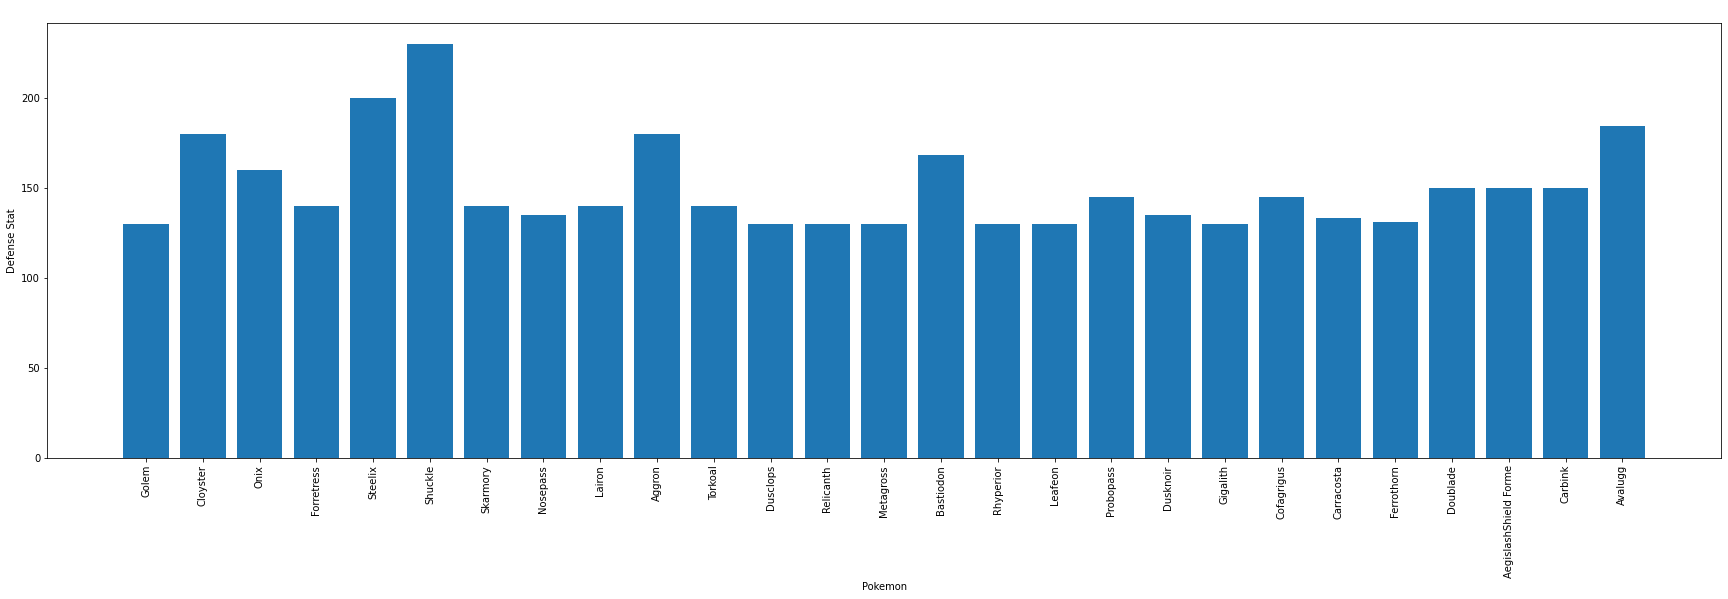

In [112]:
# Determining the defense stat
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

plt.bar(defense_pkmn_df['Name'], defense_pkmn_df["Defense"])
plt.title('Pokemon Defense Stat',color='white')
plt.xlabel('Pokemon')
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Defense Stat')

plt.show()

From the chart we can determine that Shuckle has the highest defense stat.

Next is special attack stat.

In [94]:
# creating a dataframe with the special attack stat over 125 Pokemon
spatk_pkmn_df = pd.DataFrame()

for index in range(len(norm_pkmn_df)):
  if int(norm_pkmn_df['Special Attack'][index]) > 125:
    spatk_pkmn_df = spatk_pkmn_df.append(norm_pkmn_df.iloc[index], ignore_index=True)
    index = index + 1
  else:
    index = index + 1
print(spatk_pkmn_df)

    Attack  Defense     HP  ...  Special Defense  Speed  Total Stat
0     50.0     45.0   55.0  ...             95.0  120.0       500.0
1     65.0     60.0   60.0  ...             75.0  110.0       500.0
2     65.0     60.0   65.0  ...             95.0  110.0       525.0
3     70.0    115.0   70.0  ...             90.0   60.0       535.0
4     60.0    110.0   65.0  ...             95.0   65.0       525.0
5     80.0     70.0   85.0  ...             75.0   90.0       535.0
6     30.0    105.0  105.0  ...            105.0   55.0       540.0
7     55.0     90.0   60.0  ...             90.0   80.0       520.0
8     60.0     65.0   85.0  ...            105.0  100.0       550.0
9     72.0     90.0   91.0  ...             90.0  108.0       580.0
10    72.0     90.0   91.0  ...             90.0  108.0       580.0
11    77.0     77.0  100.0  ...            128.0   90.0       600.0
12   150.0     50.0   60.0  ...             50.0   60.0       520.0

[13 rows x 9 columns]


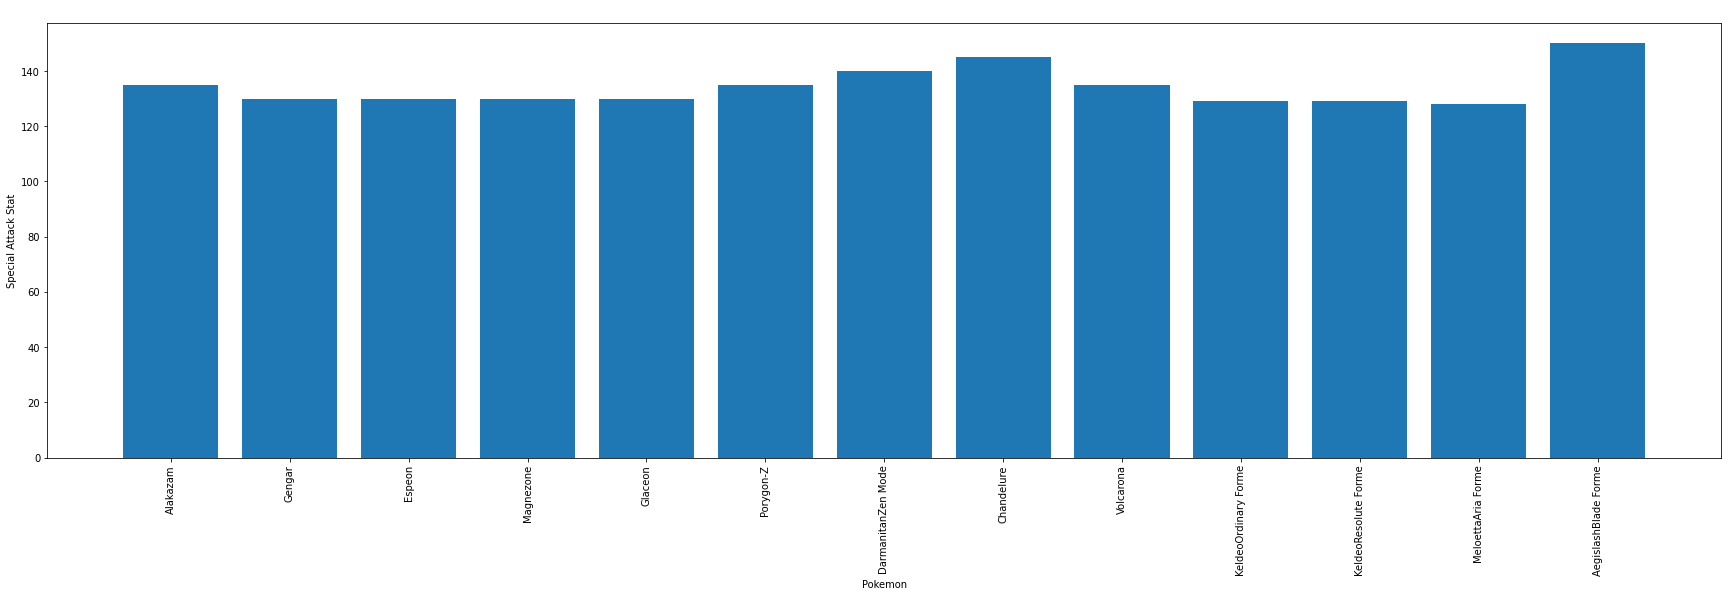

In [113]:
# Determining the special attack stat
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

plt.bar(spatk_pkmn_df['Name'], spatk_pkmn_df["Special Attack"])
plt.title('Pokemon Special Attack Stat',color='white')
plt.xlabel('Pokemon')
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Special Attack Stat')

plt.show()

From the chart we can determine that Aegislash (in blade form) has the highest special attack stat.

Next is special defense stat.

In [100]:
# creating a dataframe with the special defense stat over 125 Pokemon
spdef_pkmn_df = pd.DataFrame()

for index in range(len(norm_pkmn_df)):
  if int(norm_pkmn_df['Special Defense'][index]) > 125:
    spdef_pkmn_df = spdef_pkmn_df.append(norm_pkmn_df.iloc[index], ignore_index=True)
    index = index + 1
  else:
    index = index + 1
print(spdef_pkmn_df)

    Attack  Defense     HP  ...  Special Defense  Speed  Total Stat
0     65.0    110.0   95.0  ...            130.0   65.0       525.0
1     10.0    230.0   20.0  ...            230.0    5.0       505.0
2     40.0     70.0   65.0  ...            140.0   70.0       465.0
3     10.0     10.0  255.0  ...            135.0   55.0       540.0
4     70.0    130.0   40.0  ...            130.0   25.0       455.0
5     52.0    168.0   60.0  ...            138.0   30.0       495.0
6     55.0    145.0   60.0  ...            150.0   40.0       525.0
7    100.0    135.0   45.0  ...            135.0   45.0       525.0
8     70.0    120.0  120.0  ...            130.0   85.0       600.0
9     50.0     30.0   70.0  ...            135.0  105.0       485.0
10    77.0     77.0  100.0  ...            128.0   90.0       600.0
11    65.0     68.0   78.0  ...            154.0   75.0       552.0
12    50.0    150.0   60.0  ...            150.0   60.0       520.0
13    65.0     65.0   95.0  ...            130.0

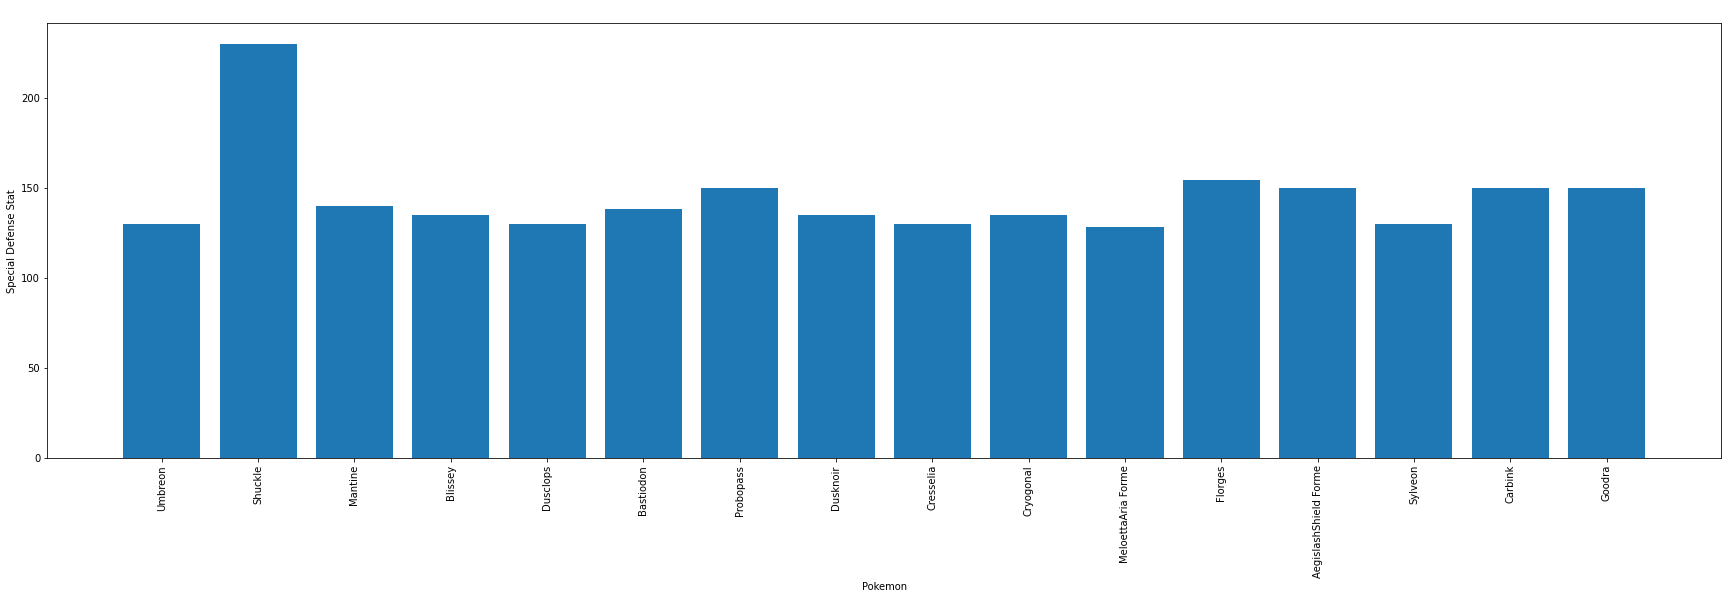

In [114]:
# Determining the special defense stat
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

plt.bar(spdef_pkmn_df['Name'], spdef_pkmn_df["Special Defense"])
plt.title('Pokemon Special Defense Stat',color='white')
plt.xlabel('Pokemon')
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Special Defense Stat')

plt.show()

From the chart we can determine that Shuckle also has the highest special defense stat.

Next is speed stat.

In [106]:
# creating a dataframe with the speed stat over 115 Pokemon
speed_pkmn_df = pd.DataFrame()

for index in range(len(norm_pkmn_df)):
  if int(norm_pkmn_df['Speed'][index]) > 115:
    speed_pkmn_df = speed_pkmn_df.append(norm_pkmn_df.iloc[index], ignore_index=True)
    index = index + 1
  else:
    index = index + 1
print(speed_pkmn_df)

    Attack  Defense     HP  ...  Special Defense  Speed  Total Stat
0     80.0     50.0   35.0  ...             70.0  120.0       405.0
1     50.0     45.0   55.0  ...             95.0  120.0       500.0
2     50.0     70.0   60.0  ...             80.0  140.0       480.0
3     65.0     60.0   65.0  ...             95.0  130.0       525.0
4    105.0     65.0   80.0  ...             75.0  130.0       515.0
5     90.0     80.0   85.0  ...             80.0  130.0       535.0
6     85.0     65.0   70.0  ...             85.0  120.0       530.0
7     85.0     60.0   60.0  ...             50.0  125.0       430.0
8     90.0     45.0   61.0  ...             50.0  160.0       456.0
9    120.0     65.0   70.0  ...             85.0  125.0       510.0
10   100.0     63.0   75.0  ...             63.0  116.0       497.0
11    67.0     85.0   60.0  ...             75.0  116.0       480.0
12    70.0     40.0   80.0  ...             60.0  145.0       495.0
13   128.0     90.0  100.0  ...             77.0

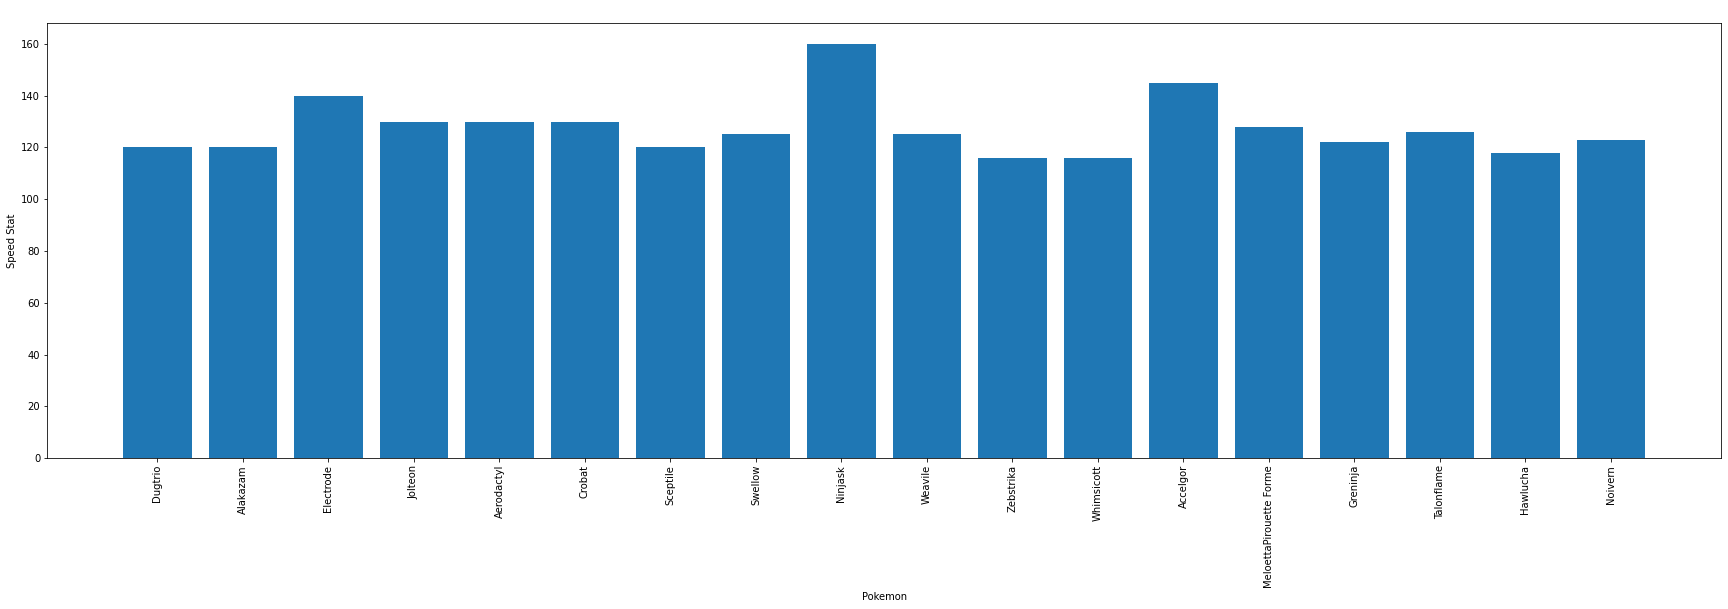

In [115]:
# Determining the speed stat
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

plt.bar(speed_pkmn_df['Name'], speed_pkmn_df["Speed"])
plt.title('Pokemon Speed Stat',color='white')
plt.xlabel('Pokemon')
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Speed Stat')

plt.show()

From the chart we can determine that Ninjask has the speed defense stat.

Overall:

*  **HP (Hit Points) Champion** - Blissey
*  **Attack Champion** - Slaking
* **Defense Champion** - Shuckle
*  **Special Attack Champion** - Aegislash (Blade Form)
*  **Special Defense Champion** - Shuckle
*  **Speed Champion** - Ninjask

Now just cause they are in best in a couple stats doesn't mean they are the best pokemon to use overall as they only have the best in one (or two) statistics. Even in Pokemon you don't want to put all your eggs in one basket.